In [1]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn

%matplotlib inline

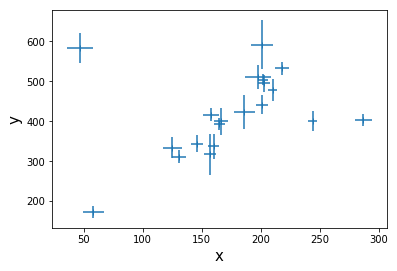

In [2]:
hoggData = np.loadtxt("hoggData.dat", dtype=np.float64, delimiter=',')

hogg_x = hoggData[:,1]
hogg_y = hoggData[:,2]
hogg_sigY = hoggData[:,3]
hogg_sigX = hoggData[:,4]
hogg_rhoXY = hoggData[:,5]

plot.errorbar(hogg_x, hogg_y, hogg_sigY, hogg_sigX, fmt='|')

plotx = np.linspace(0,300,2000)

plot.xlabel('x', size=15)
plot.ylabel('y', size=15);

# Section 1 - Standard Practice

### Exercise 1: 
Using the standard linear algebra method of this Section, fit the straight line $y = m x + b$ to the $x$, $y$, and $\sigma_y$ values for data points $5$ through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the columns for σx and ρxy. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1. 

What is the standard uncertainty variance $\sigma^2_m$ on the slope of the line?

In [3]:
Y = hogg_y[5:]
A = np.column_stack((np.ones_like(Y), hogg_x[5:]))
C = np.diag(hogg_sigY[5:])

ACA = np.dot(A.T, np.dot(np.linalg.inv(C), A))
ACY = np.dot(A.T, np.linalg.solve(C,Y))

X = np.linalg.solve(ACA, ACY)

b, m = X

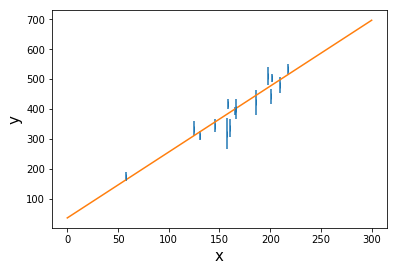

In [4]:
plot.errorbar(hogg_x[5:], hogg_y[5:], hogg_sigY[5:], fmt='|')

plot.plot(plotx, b + m*plotx)

plot.xlabel('x', size=15)
plot.ylabel('y', size=15);

In [5]:
print(fr"The standard uncertainty on m is {np.sqrt(ACA[1,1])}")

The standard uncertainty on m is 140.52258882975588


### Exercise 2
Repeat Exercise 1 but for all the data points in Table 1 on page 6. Your plot should end up looking like Figure 2. What is the standard uncertainty variance $\sigma^2_m$ on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you have included beyond those used in Exercise 1?

In [6]:
Y = hogg_y
A = np.column_stack((np.ones_like(Y), hogg_x))
C = np.diag(hogg_sigY)

ACA = np.dot(A.T, np.dot(np.linalg.inv(C), A))
ACY = np.dot(A.T, np.linalg.solve(C,Y))

X = np.linalg.solve(ACA, ACY)

b, m = X

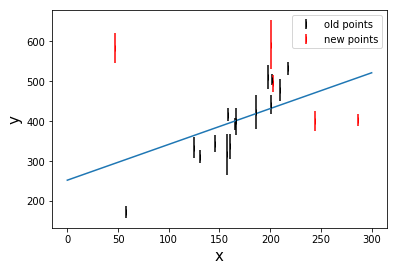

In [7]:
plot.errorbar(hogg_x[5:], hogg_y[5:], hogg_sigY[5:], fmt='|', color='k', label='old points')
plot.errorbar(hogg_x[:5], hogg_y[:5], hogg_sigY[:5], fmt='|', color='r', label='new points')

plot.plot(plotx, b + m*plotx)

plot.legend()

plot.xlabel('x', size=15)
plot.ylabel('y', size=15);

In [8]:
print(fr"The standard uncertainty on m is {np.sqrt(ACA[1,1])}")

The standard uncertainty on m is 174.07492934300973


### Exercise 3
Generalize the method of this Section to fit a general quadratic (second order) relationship. Add another column to matrix A containing the values $x_i^2$, and another element to vector $X$ (call it $q$). Then re-do Exercise 1
but fitting for and plotting the best quadratic relationship
$$ g(x) = q x^2 + m x + b . $$
Your plot should end up looking like Figure 3.

In [9]:
Y = hogg_y[5:]
A = np.column_stack((np.ones_like(Y), hogg_x[5:], hogg_x[5:]**2))
C = np.diag(hogg_sigY[5:])

ACA = np.dot(A.T, np.dot(np.linalg.inv(C), A))
ACY = np.dot(A.T, np.linalg.solve(C,Y))

X = np.linalg.solve(ACA, ACY)

b, m, q = X

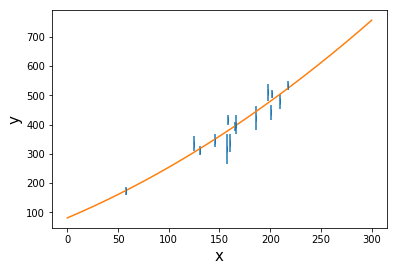

In [10]:
plot.errorbar(hogg_x[5:], hogg_y[5:], hogg_sigY[5:], fmt='|')

plot.plot(plotx, b + m*plotx + q*(plotx**2))

plot.xlabel('x', size=15)
plot.ylabel('y', size=15);

# Section 2 - The Objective Function

### Exercise 4
Imagine a set of $N$ measurements $t_i$, with uncertainty variances $\sigma^2_{t_i}$, all of the same (unknown) quantity $T$. Assuming the generative model that each $t_i$ differs from $T$ by a Gaussian-distributed offset, taken from a Gaussian with zero mean and variance $\sigma^2_{t_i}$, write down an expression for
the log likelihood $\ln{\mathcal{L}}$ for the data given the model parameter $T$. 

Take a derivative and show that the maximum likelihood value for $T$ is the usual
weighted mean.

The Gaussian log-likelihood in this case is

$$ \ln{\mathcal{L}(t_i, \sigma_t | T)} = -\frac{N}{2}\ln(2\pi) - \frac{N}{2}\ln{\sigma_{t_i}^2} - \sum_{i=1}^N \frac{(t_i - T)^2}{2\sigma_{t_i}^2} $$

The derivative of this likelihood is

$$ \frac{\partial \ln{\mathcal{L(t_i, \sigma_t | T)}}}{\partial T}  = -\frac{\partial}{\partial T} \sum_{i=1}^N \frac{(t_i - T)^2}{{2\sigma_{t_i}^2}} = \sum_{i=1}^N \frac{(t_i - T)}{\sigma_{t_i}^2} $$

This takes its maximum when the derivative is $0$

$$ \sum_{i=1}^N \frac{(t_i - T)}{\sigma_{t_i}^2} = 0 = \sum_{i=1}^N \frac{t_i}{\sigma_{t_i}^2} -T\sum_{i=1}^N \frac{1}{\sigma_{t_i}^2} $$

So, rearranging, we get the weighted mean as expected

$$ \hat{T} =  \frac{\sum_{i=1}^N \frac{t_i}{\sigma_{t_i}^2}}{\sum_{i=1}^N \frac{1}{\sigma_{t_i}^2}} $$

### Exercise 5
Take the matrix formulation for $\chi^2$ given in equation (7) and take derivatives to show that the minimum is at the matrix location given in equation (5).

Equation 7 is
$$\chi^2 = [Y-AX]^TC^{-1}[Y-AX] $$
By the product rule, we have
$$ \frac{\partial}{\partial X} \chi^2 = \left(\frac{\partial}{\partial X}[Y-AX]^T\right)C^{-1}[Y-AX] + [Y-AX]^T\left(\frac{\partial}{\partial X} C^{-1}[Y-AX]\right) $$
Differentiating, we get
$$ \frac{\partial}{\partial X} \chi^2 = -A^TC^{-1}[Y-AX] [Y-AX]^TC^{-1}[-A] $$
Multiplying out
$$ \frac{\partial}{\partial X} \chi^2 = -A^TC^{-1}Y + A^TC^{-1}AX - Y^TC^{-1}A + [AX]^TC^{-1}A $$
Since $-A^TC^{-1}Y$ is a scalar, it equals its own transpose
$$ \frac{\partial}{\partial X} \chi^2 = -2A^TC^{-1}Y + A^TC^{-1}AX + X^TA^TC^{-1}A $$
The two terms in X are also simply transposes of one another, and can thus be trivially added together
$$ \frac{\partial}{\partial X} \chi^2 = -2A^TC^{-1}Y + 2 A^TC^{-1}AX $$
$X$ takes its maximum likelihood value when the derivative is $0$
$$ -2A^TC^{-1}Y + 2 A^TC^{-1}A\hat{X} = 0 $$
Rearranging
$$ A^TC^{-1}A\hat{X} = 2A^TC^{-1}Y $$
And so
$$ \hat{X} = \left(A^TC^{-1}A\right)^{-1}A^TC^{-1}Y $$
As given in equation 5

# Section 3 - Pruning Outliers

### Exercise 6
 Using the mixture model proposed above—that treats the distribution as a mixture of a thin line containing a fraction $[1−P_b]$ of the points and a broader Gaussian containing a fraction $P_b$ of the points—find the bestfit
(the maximum a posteriori) straight line $y = m x + b$ for the $x$, $y$, and $\sigma_y$ for the data in Table 1 on page 6. Before choosing the MAP line, marginalize over parameters (Pb, Yb, Vb). That is, if you take a sampling approach, this means sampling the full five-dimensional parameter space but then choosing the peak value in the histogram of samples in the two-dimensional parameter space (m, b). Make one plot showing this two-dimensional histogram, and another showing the points, their uncertainties, and the MAP line. 

How does this compare to the standard result you obtained in Exercise 2? Do you like the MAP line better or worse? 
For extra credit, plot a sampling of 10 lines drawn from the marginalized posterior distribution for $(m, b)$ (marginalized over $P_b$, $Y_b$, $V_b$) and plot the samples as a set of light grey or transparent lines. Your plot should look like Figure 4.

Our likelihood function here is

$$ \mathcal{L} = \prod_{i=1}^N \left[\frac{1-P_b}{\sqrt{2\pi \sigma^2_{y_i}}}\exp\left(-\frac{[y_i -mx_i -b]^2}{2\sigma^2_{y_i}}\right) + \frac{P_b}{\sqrt{2\pi V_b}}\exp\left(-\frac{[y_i - Y_b]^2}{2V_b}\right) \right] $$

Which combines normal gaussian likelihoods, combined in a particular way

In [11]:
def gauss_ln_like(mu, var, data):
    """
    Gaussian log-likelihood function.
    """

    t1 = -0.5*np.log(2.*np.pi)

    t2 = -0.5 * np.log(var)

    t3 = -0.5 * ((data-mu)**2)/var

    return t1 + t2 + t3

In [12]:
from scipy.special import logsumexp

In [13]:
def outlier_posterior(theta):
    """
    The posterior given in equation 17 of the paper. Written as taking one tuple of all the params, 
    for ease of use with the stochastic sampler later
    """
    
    # get the params
    m, b, pb, yb, vb = theta['m'], theta['b'], theta['pb'], theta['yb'], np.exp(theta['logvb'])
    
    # the foreground
    fgMean = b + m*hogg_x
    fgVar = hogg_sigY**2
    
    # the background model
    bgMean = yb
    bgVar = vb
    
    fgLike = gauss_ln_like(fgMean, fgVar, hogg_y) + np.log(1.-pb)
    bgLike = gauss_ln_like(bgMean, bgVar, hogg_y) + np.log(pb)

    lnlikes = np.column_stack((fgLike, bgLike))
    
    ll = np.sum(logsumexp(lnlikes, axis=1))
    
    return ll

We'll use the `cpnest` nested sampling code for this problem, which can be installed via `pip install cpnest`, or the repo can be found here; https://github.com/johnveitch/cpnest

In [14]:
import cpnest
import cpnest.model

In [15]:
class hogg_outlier_model(cpnest.model.Model):
    
    names = ['m', 'b', 'pb', 'yb', 'logvb']
    bounds = [[-6,6], [-100,300], [0,1], [0,1000], [0.,30]]
    
    @staticmethod
    def log_likelihood(theta):
        return outlier_posterior(theta)

In [16]:
worker = cpnest.CPNest(hogg_outlier_model(), nlive=512, verbose=0)
worker.run()
posterior_samples = worker.get_posterior_samples()

Running with 4 parallel threads


Sampler process 13909: MCMC samples accumulated = 0
Sampler process 13908: MCMC samples accumulated = 0
Sampler process 13911: MCMC samples accumulated = 0
Sampler process 13909 - mean acceptance 0.144: exiting
Sampler process 13908 - mean acceptance 0.134: exiting
Sampler process 13910: MCMC samples accumulated = 0
Sampler process 13911 - mean acceptance 0.163: exiting
Sampler process 13910 - mean acceptance 0.133: exiting


Final evidence: -118.43
Information: 10.37


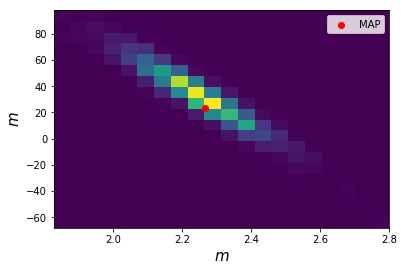

In [17]:
# crappy MAP estimate, but it's not the correct thing to report anyway...

h, m_edges, b_edges = np.histogram2d(posterior_samples['m'], posterior_samples['b'],bins=20)
map_loc = np.unravel_index(h.argmax(), h.shape)

map_m = 0.5*(m_edges[map_loc[0]] + m_edges[map_loc[0]])
map_b = 0.5*(b_edges[map_loc[1]] + b_edges[map_loc[1]])

map_m, map_b

plot.hist2d(posterior_samples['m'], posterior_samples['b'],bins=20)
plot.scatter([map_m], [map_b],color='r', label='MAP')
plot.xlabel(r'$m$', size=15)
plot.ylabel(r'$m$', size=15)
plot.legend()

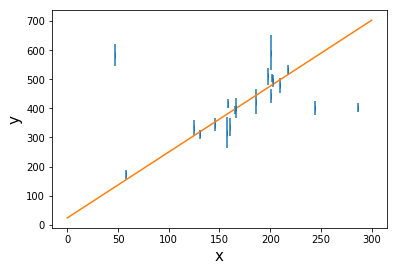

In [18]:
plot.errorbar(hogg_x, hogg_y, hogg_sigY, fmt='|')

plot.plot(plotx, map_b + map_m*plotx)
plot.xlabel('x', size=15)
plot.ylabel('y', size=15);

### Exercise 6 - Extra
For extra credit, plot a sampling of 10 lines drawn from the marginalized posterior distribution for $(m, b)$ (marginalized over $P_b$, $Y_b$, $V_b$) and plot the samples as a set of light grey or transparent lines. Your plot should look like Figure 4.

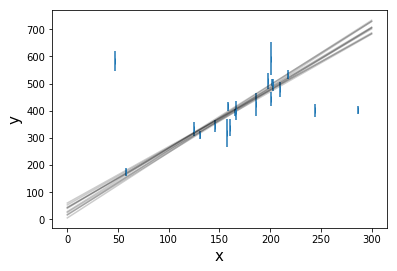

In [19]:
marginalised = np.column_stack((posterior_samples['m'], posterior_samples['b']))

sample_inds = np.random.choice(range(len(marginalised)), 10)
samples = marginalised[sample_inds]

for s in samples:
    sm,sb = s
    plot.plot(plotx, sb + sm*plotx, alpha=0.2, color='k')
    
plot.errorbar(hogg_x, hogg_y, hogg_sigY, fmt='|')
plot.xlabel('x', size=15)
plot.ylabel('y', size=15);

### Exercise 7
Solve Exercise 6 but now plot the fully marginalized (over $m$, $b$, $Y_b$, $V_b$) posterior distribution function for parameter $P_b$. Is this distribution peaked about where you would expect, given the data? Now repeat the problem, but dividing all the data uncertainty variances $\sigma^2_{y_i}$ by 4 (or dividing
the uncertainties $\sigma_{y_i}$ by 2). Again plot the fully marginalized posterior
distribution function for parameter Pb. Your plots should look something like
those in Figure 5. Discuss

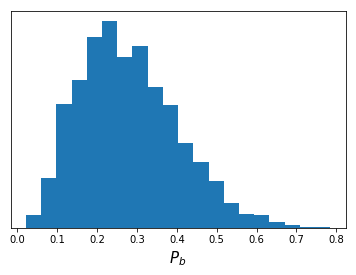

In [20]:
plot.hist(posterior_samples['pb'], bins=20)
plot.yticks([])
plot.xlabel(r'$P_b$', size=15);

Eyeballing it, there are arguably between 3 and 4 outliers in the data, so a peat between 0.2 and 0.4 makes sense. 

With half the error, the data looks like;

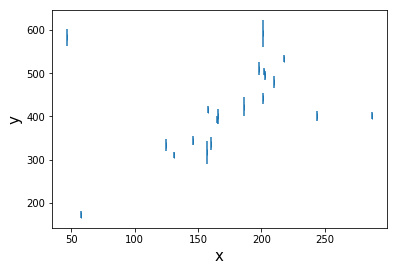

In [21]:
plot.errorbar(hogg_x, hogg_y, 0.5*hogg_sigY, fmt='|')
plot.xlabel('x', size=15)
plot.ylabel('y', size=15);

In [22]:
def outlier_posterior_half_error(theta):
    """
    The posterior given in equation 17 of the paper. Written as taking one tuple of all the params, 
    for ease of use with the stochastic sampler later
    """
    
    # get the params
    m, b, pb, yb, vb = theta['m'], theta['b'], theta['pb'], theta['yb'], np.exp(theta['logvb'])
    
    # the foreground
    fgMean = b + m*hogg_x
    fgVar = (hogg_sigY/2.)**2
    
    # the background model
    bgMean = yb
    bgVar = vb
    
    fgLike = gauss_ln_like(fgMean, fgVar, hogg_y) + np.log(1.-pb)
    bgLike = gauss_ln_like(bgMean, bgVar, hogg_y) + np.log(pb)

    lnlikes = np.column_stack((fgLike, bgLike))
    
    ll = np.sum(logsumexp(lnlikes, axis=1))
    
    return ll

class hogg_outlier_model_half_error(cpnest.model.Model):
    
    names = ['m', 'b', 'pb', 'yb', 'logvb']
    bounds = [[-6,6], [-100,300], [0,1], [0,1000], [0.,30]]
    
    @staticmethod
    def log_likelihood(theta):
        return outlier_posterior_half_error(theta)

In [23]:
worker = cpnest.CPNest(hogg_outlier_model_half_error(), nlive=512, verbose=0)
worker.run()
posterior_samples = worker.get_posterior_samples()

Running with 4 parallel threads


Sampler process 13949: MCMC samples accumulated = 0
Sampler process 13951: MCMC samples accumulated = 0
Sampler process 13950: MCMC samples accumulated = 0
Sampler process 13948: MCMC samples accumulated = 0
Sampler process 13949 - mean acceptance 0.146: exiting
Sampler process 13951 - mean acceptance 0.139: exiting
Sampler process 13948 - mean acceptance 0.122: exiting
Sampler process 13950 - mean acceptance 0.142: exiting


Final evidence: -124.87
Information: 11.25


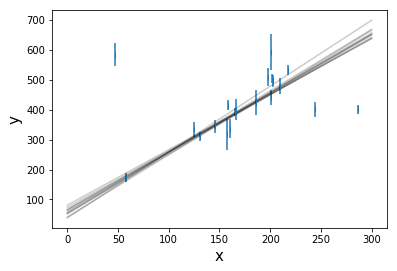

In [24]:
marginalised = np.column_stack((posterior_samples['m'], posterior_samples['b']))

sample_inds = np.random.choice(range(len(marginalised)), 10)
samples = marginalised[sample_inds]

for s in samples:
    sm,sb = s
    plot.plot(plotx, sb + sm*plotx, alpha=0.2, color='k')
    
plot.errorbar(hogg_x, hogg_y, hogg_sigY, fmt='|')
plot.xlabel('x', size=15)
plot.ylabel('y', size=15);

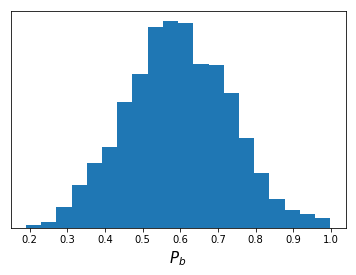

In [25]:
plot.hist(posterior_samples['pb'], bins=20)
plot.yticks([])
plot.xlabel(r'$P_b$', size=15);

The posterior on $m$ and $b$ is much tighter, which means that many more points have been considered outliers, thus the higher support on $P_b$

# Section 4 - Uncertainties in the best-fit parameters

### Exercise 8 
Compute the standard uncertainty $\sigma^2_m$ obtained for the slope of the line found by the standard fit you did in Exercise 2. Now make jackknife (20 trials) and bootstrap estimates for the uncertainty $\sigma^2_m$. How do
the uncertainties compare and which seems most reasonable, given the data and uncertainties on the data?

In [64]:
def standard_uncertainty(data):
    
    xs = data[:,1]
    ys = data[:,2]
    sigs = data[:,3]
    
    Y = ys
    A = np.column_stack((np.ones_like(Y), xs))
    C = np.diag(sigs)

    ACA = np.linalg.inv(np.dot(A.T, np.dot(np.linalg.inv(C), A)))

    return ACA[1,1]

def standard_fit(data):
    
    xs = data[:,1]
    ys = data[:,2]
    sigs = data[:,3]
    
    Y = ys
    A = np.column_stack((np.ones_like(Y), xs))
    C = np.diag(sigs)

    ACA = np.dot(A.T, np.dot(np.linalg.inv(C), A))

    ACY = np.dot(A.T, np.linalg.solve(C,Y))

    X = np.linalg.solve(ACA, ACY)

    return X[1]

In [70]:
def bootstrap_uncertainty(n_trials=20):
    
    n_data = len(hoggData)
    
    standard_estimate = standard_fit(hoggData)
    
    bs_estimates = []
    for i in range(20):
        inds = np.random.choice(range(n_data), size=n_data, replace=True)
        bs_estimates.append(standard_fit(hoggData[inds]))
    bs_estimates = np.array(bs_estimates)
    
    return (1/n_trials)* np.sum(np.square(standard_estimate - bs_estimates))

In [71]:
def jackknife_uncertainty(n_trials=20):
    
    n_data = len(hoggData)
    
    jk_estimates = []
    for i in range(n_trials):
        ind = np.random.randint(n_data)
        est = standard_fit(np.concatenate((hoggData[:ind], hoggData[ind+1:])))
        jk_estimates.append(est)
    jk_estimates = np.array(jk_estimates)
    
    m = np.mean(jk_estimates)
    
    return ((n_trials-1)/n_trials) * np.sum(np.square(m - jk_estimates))

In [72]:
print(f"The standard uncertainty on m for the data is {standard_uncertainty(hoggData)}")
print(f"The bootstrap uncertainty on m for the data is {bootstrap_uncertainty()}")
print(f"The jackknife uncertainty on m for the data is {jackknife_uncertainty()}")

The standard uncertainty on m for the data is 0.00033603375449975967
The bootstrap uncertainty on m for the data is 0.4111528465107078
The jackknife uncertainty on m for the data is 0.784983336769617
